In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [11]:
image_path = r"plant-pathology-2020-fgvc7\images"
train_path = r"plant-pathology-2020-fgvc7\train.csv"
test_path = r"plant-pathology-2020-fgvc7\test.csv"

In [12]:
DIR = image_path

In [13]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [14]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [15]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


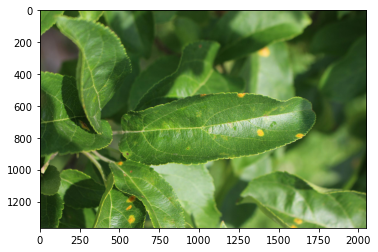

In [17]:
image1=Image.open(image_path + r'\Test_0.jpg')
plt.imshow(image1)
plt.show()

In [18]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [19]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [20]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [21]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [22]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [23]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path, image_path + r'\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path, image_path + r'\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path, image_path + r'\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path, image_path + r'\train\scab')
                
        elif search("Test",img):
            shutil.copy(path, image_path + r'\test')

In [24]:
shutil.os.mkdir(image_path + r'\train')
shutil.os.mkdir(image_path + r'\train\healthy')
shutil.os.mkdir(image_path + r'\train\multiple_disease')
shutil.os.mkdir(image_path + r'\train\rust')
shutil.os.mkdir(image_path + r'\train\scab')

shutil.os.mkdir(image_path + r'\test')

In [25]:
train_dir=create_train_data()

100%|██████████| 3644/3644 [00:49<00:00, 73.01it/s] 


# Data Preprocessing

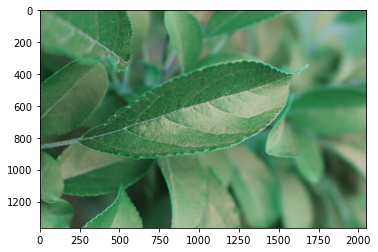

In [27]:
Train_DIR = image_path + r'\train'
Categories = ['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

# Data Visualization

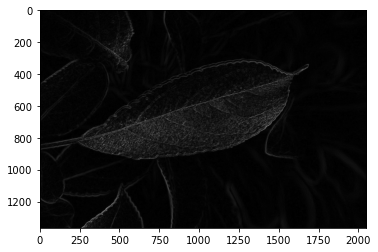

In [29]:
Train_Dir = image_path + r'\train'
Categories=['healthy','multiple_diseases','rust','scab']
from skimage.color import rgb2gray
from skimage import filters
from pylab import *
for j in Categories:
    path=os.path.join(Train_Dir,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img))
        grayscale = rgb2gray(old_image)#Edge Detection
        ed_sobel = filters.sobel(grayscale)
        plt.imshow(ed_sobel, cmap='gray')
        plt.show()
        break
    break

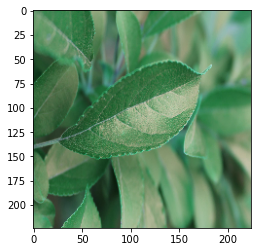

In [28]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

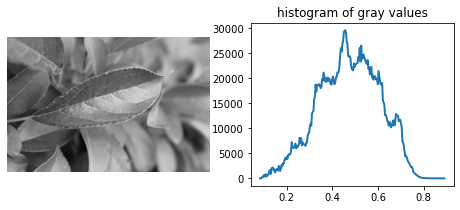

In [30]:
Train_Dir = image_path + r'\train'
Categories=['healthy','multiple_diseases','rust','scab']
from skimage.color import rgb2gray
from skimage import filters
from pylab import *
from skimage.exposure import histogram
for j in Categories:
    path=os.path.join(Train_Dir,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img))
        grayscale = rgb2gray(old_image)#Edge Detection
        hist, hist_centers = histogram(grayscale)#Plotting the Image and the Histogram of gray values
        fig, axes = plt.subplots(1, 2, figsize=(8, 3))
        axes[0].imshow(grayscale, cmap=plt.cm.gray)
        axes[0].axis('off')
        axes[1].plot(hist_centers, hist, lw=2)
        axes[1].set_title('histogram of gray values')
        break
    break